In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### setup inline format style of tables

In [231]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [232]:
sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})

In [233]:
data = pd.read_csv('Data_Shared_WorkingFile.csv')
data.head()

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
0,201A,1,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
1,201A,2,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
2,201A,3,201AERAT,3504,NaN,600,15,3.0,8.0,1,0,0,0,0,NaN,NaN
3,201A,4,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
4,201A,5,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN


### Checking out the shape of the data file.

In [234]:
print ("Data Shape:", data.shape)

Data Shape: (71568, 16)


### We can see that there are roughly 4k critical data pts available.   Minimum abs error is best so it makes sense that the process has Error mean close to zero at -0.07.  1s = ~0.9

In [235]:
data.dtypes

Entity         object
Run_On_Ent      int64
Lot            object
Op              int64
Error         float64
Feature1        int64
Feature2        int64
Feature3      float64
Feature4      float64
Attribute1      int64
Attribute2      int64
Attribute3      int64
Attribute4      int64
Attribute5      int64
Fam_Type       object
DIC_Design     object
dtype: object

In [236]:
data.Error.describe()

count    3985.000000
mean       -0.073852
std         0.900633
min        -7.700000
25%        -0.544000
50%        -0.048000
75%         0.453000
max         6.467000
Name: Error, dtype: float64

### see what columns have data missing

In [237]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Count_Nulls']
nulls.index.name = 'Data_Column'
nulls

,Count_Nulls
Data_Column,
Error,67583
DIC_Design,65961
Fam_Type,65961
Attribute5,0
Attribute4,0
Attribute3,0
Attribute2,0
Attribute1,0
Feature4,0


### We can see the Error of the whole entire data set is normal Gaussian distribution centered about zero.

Error skew: -0.342304438317


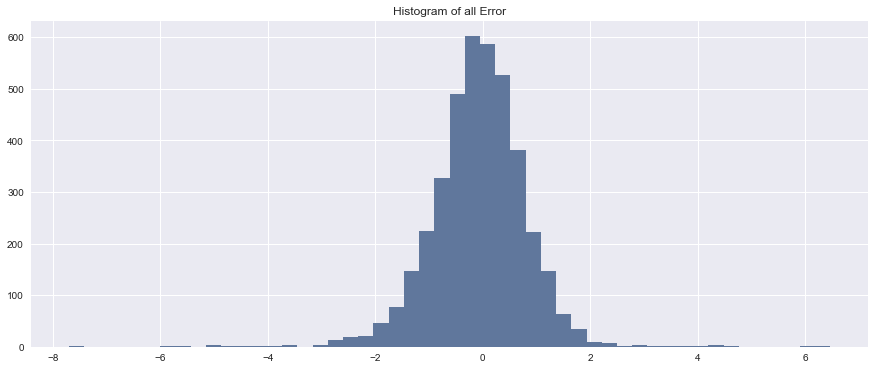

In [238]:
print('Error skew:',data.Error.skew())
plt.figure(figsize=(15,6))
plt.hist(data.Error.dropna(),bins=50)
plt.title('Histogram of all Error')

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


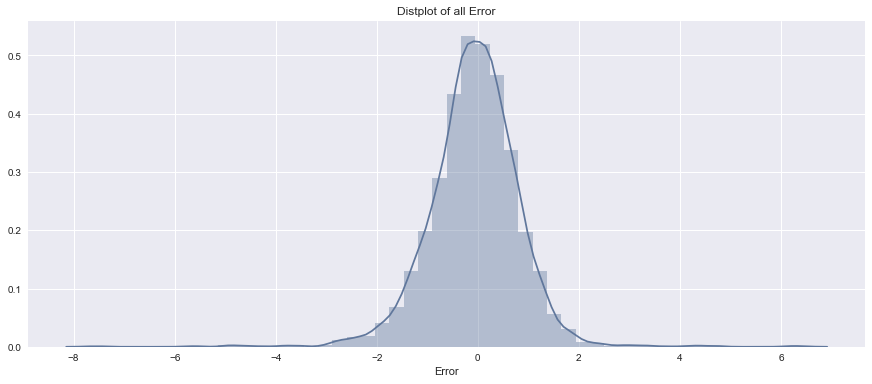

In [239]:
plt.figure(figsize=(15,6))
sns.distplot(data.Error.dropna(), bins = 50)
plt.title('Distplot of all Error')

### Explore data sets by Entity.  Common in production environments to break out and explore data by tool or entity to see if they are performing similarly.

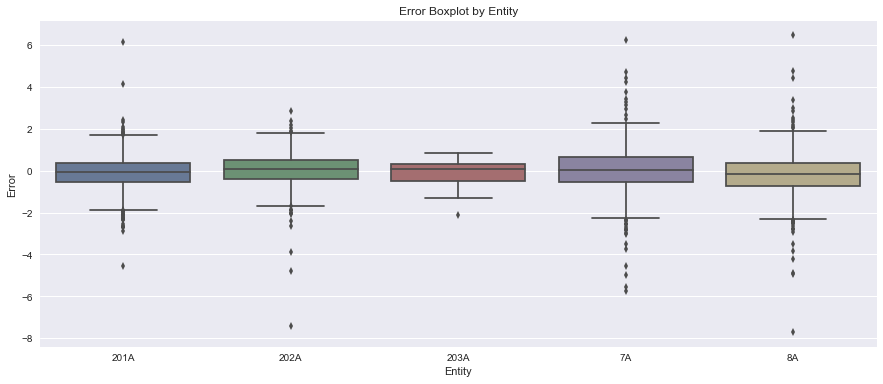

In [240]:
#boxplots by entity
datacompare = data.dropna()
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Entity', y = 'Error', data = datacompare)
plt.title('Error Boxplot by Entity')

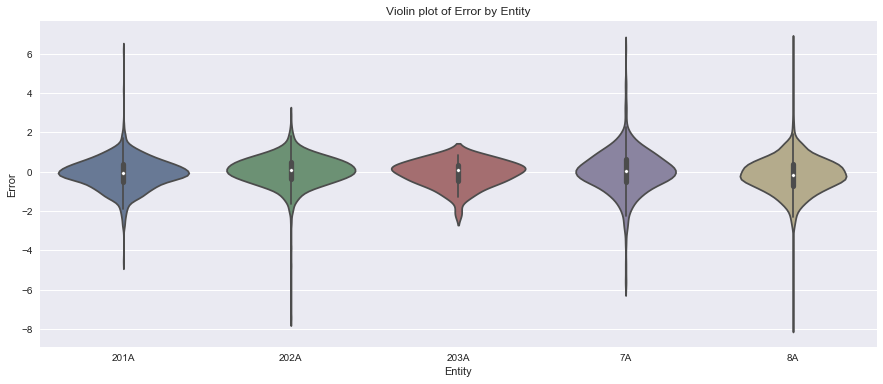

In [241]:
plt.figure(figsize=(15,6))
sns.violinplot(x = 'Entity', y = 'Error', data = datacompare)
plt.title('Violin plot of Error by Entity')

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


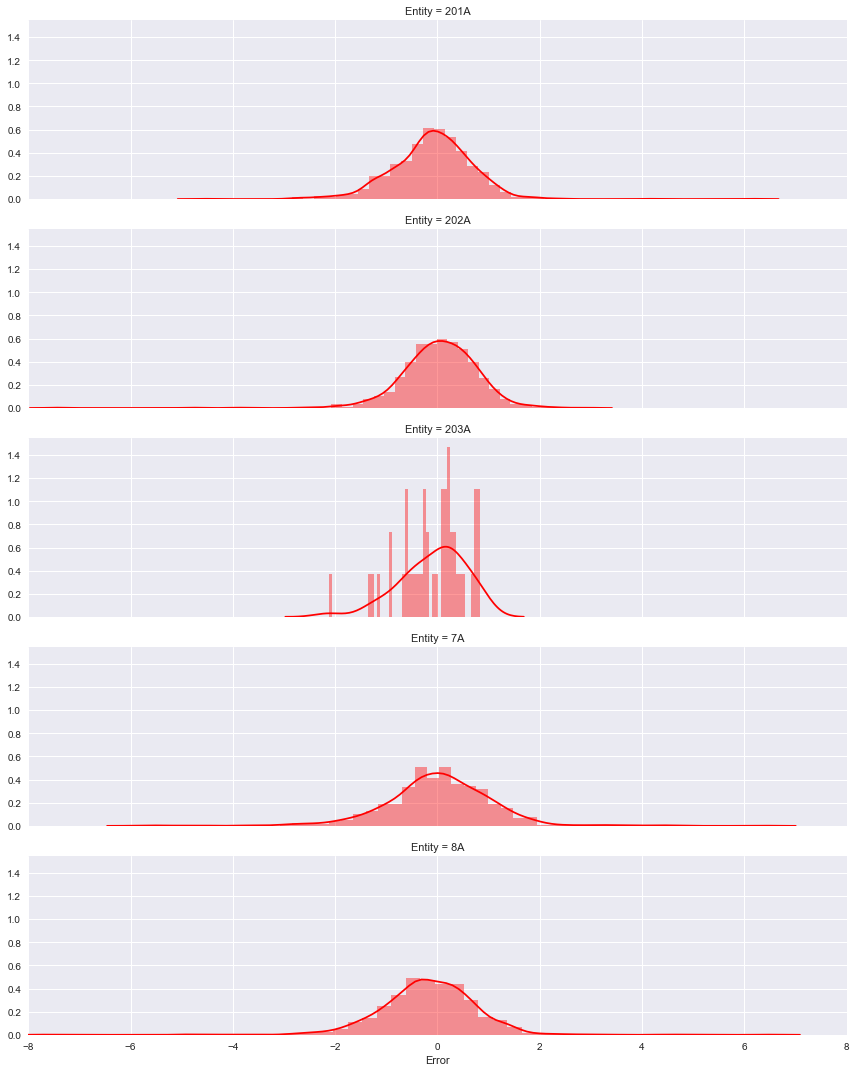

In [242]:
#very noteworthy that Entity = 203A does not have as uniform a dataset as the other entities.  possibly remove from later 
#models to explore impact.
g = sns.FacetGrid(datacompare, row = "Entity", aspect = 4, xlim = (-8,8))
g.map(sns.distplot, 'Error', bins = 50, color = 'r')

### Create time series of a single Entity run (where we see Run_On_Ent restart at 1).  This will be used as our toy dataset.  

In [243]:
#create toy data sets by entity, we will work w toy7 which has the most rows and a very normal distribution
toy7_df = data.loc[data['Entity'] == '7A']
toy8_df = data.loc[data['Entity'] == '8A']
toy201_df = data.loc[data['Entity'] == '201A']
toy202_df = data.loc[data['Entity'] == '202A']
toy203_df = data.loc[data['Entity'] == '203A']
toy7_df

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
27805,7A,1,246186,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
27806,7A,2,7A_CLEAN,3504,NaN,600,0,8.0,0.0,0,0,0,0,1,NaN,NaN
27807,7A,3,245352,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
27808,7A,4,246782,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
27809,7A,5,245739,3534,NaN,800,15,6.0,5.0,1,1,0,0,0,NaN,NaN
27810,7A,6,245927,3504,NaN,800,20,1.5,5.0,1,1,0,1,0,NaN,NaN
27811,7A,7,7AERAT,3504,NaN,600,15,3.0,8.0,1,0,0,0,0,NaN,NaN
27812,7A,8,7ACMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
27813,7A,9,246621,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
27814,7A,10,246676,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN


### Focusing on Toy7 data set

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


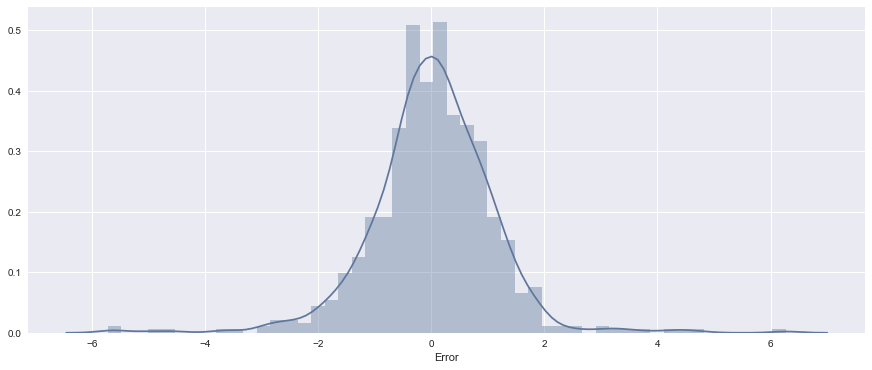

In [244]:
#we can see the toy dataset is also a well formed Gaussian centered about 0.
plt.figure(figsize=(15,6))
sns.distplot(toy7_df.Error.dropna(), bins = 50)

In [245]:
toy7_df.Error.describe()

count    764.000000
mean       0.017473
std        1.086037
min       -5.725000
25%       -0.524750
50%        0.046500
75%        0.648000
max        6.269000
Name: Error, dtype: float64

### the time series scatter plot is significant in that it shows a couple of significant things.  we can see the mean and variability are roughly stable throughout the life of the dataset.  Variance is homoscedastic although it may tighten slightly in the dataset after 15k.  Also, the customer's critical data does not actually start until roughly 4k data pts.  

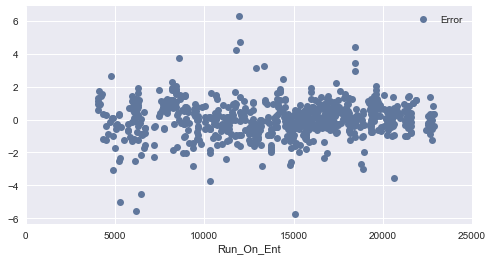

In [246]:
toy7_df.plot(x = 'Run_On_Ent', y = 'Error', xlim = [0, 25000], style = 'o')

### Begin data analysis by lagging all features and attributes from 1-20 lags and creating a new df from this combined with all the "Error" measurements in the toy7 dataset.  The lag was chosen with input from customer process data expert.  Experimental evidence points to lagging influence being confined to most preceding runs (possibly only several runs).  Therefore, we cap the lagging to 20 and increment by single runs.   Intitial analysis will be confined to exploring each attr/variable independantly, but later will expand to combinations.

In [247]:
#build a new dataframe that lags over each feature.  (default lag = 2 if none provided)
def FeatureLagging (datasystem, lag = 2, dropna = False):
    if type(datasystem) is pd.DataFrame:
        new_dict = {}
        for col_name in datasystem:
            if "Feature" in col_name or "Attribute" in col_name:
                new_dict[col_name] = datasystem[col_name]
                for xshift in range(1, lag + 1):
                    new_dict['%s_lag%d' % (col_name, xshift)] = datasystem[col_name].shift(xshift)
            else: 
                pass
            res = pd.DataFrame(new_dict, index = datasystem.index)
            
    else:
        print('error - must be 2D dataframe')
        return None

    if dropna == True:
        return res.dropna()
    else: return res


In [248]:
#use sequential run_on_ent as our row index
s = toy7_df.set_index('Run_On_Ent')
s.head()

,Entity,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
Run_On_Ent,,,,,,,,,,,,,,,
1,7A,246186,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
2,7A,7A_CLEAN,3504,NaN,600,0,8.0,0.0,0,0,0,0,1,NaN,NaN
3,7A,245352,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
4,7A,246782,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
5,7A,245739,3534,NaN,800,15,6.0,5.0,1,1,0,0,0,NaN,NaN


In [249]:
#Use feature lagging function to shift all attributes/features and align with Error into a new df
lag7_df = FeatureLagging(s,lag=20,dropna=False)
lag7_df.insert(0, 'Error', s.Error)
lag7_df#.Error.describe()

,Error,Attribute1,Attribute1_lag1,Attribute1_lag10,Attribute1_lag11,Attribute1_lag12,Attribute1_lag13,Attribute1_lag14,Attribute1_lag15,Attribute1_lag16,...,Feature4_lag19,Feature4_lag2,Feature4_lag20,Feature4_lag3,Feature4_lag4,Feature4_lag5,Feature4_lag6,Feature4_lag7,Feature4_lag8,Feature4_lag9
Run_On_Ent,,,,,,,,,,,,,,,,,,,,,
1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,0.0,5.0,NaN,NaN,NaN,NaN,NaN
6,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,5.0,0.0,5.0,NaN,NaN,NaN,NaN
7,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,5.0,5.0,0.0,5.0,NaN,NaN,NaN
8,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,5.0,5.0,5.0,0.0,5.0,NaN,NaN
9,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,NaN,5.0,5.0,5.0,5.0,0.0,5.0,NaN


In [250]:
#new ndarray where we only look at row with 'Error' available and the corresponding lagged attributes from out matrix
lag7data_df = lag7_df.dropna()
lag7data_df

,Error,Attribute1,Attribute1_lag1,Attribute1_lag10,Attribute1_lag11,Attribute1_lag12,Attribute1_lag13,Attribute1_lag14,Attribute1_lag15,Attribute1_lag16,...,Feature4_lag19,Feature4_lag2,Feature4_lag20,Feature4_lag3,Feature4_lag4,Feature4_lag5,Feature4_lag6,Feature4_lag7,Feature4_lag8,Feature4_lag9
Run_On_Ent,,,,,,,,,,,,,,,,,,,,,
4031,0.929,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,5.0,5.0,4.00,5.0,4.00,5.0,4.0,5.0,8.0
4057,1.101,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4.0,5.0,4.0,5.00,4.0,5.00,5.0,4.0,5.0,5.0
4064,1.304,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,0.0,5.0,5.00,5.0,4.00,5.0,4.0,4.0,5.0
4066,0.599,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,4.0,4.0,4.00,0.0,5.00,5.0,4.0,5.0,4.0
4121,1.738,0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,5.0,5.0,5.0,5.00,4.0,4.00,5.0,4.0,5.0,4.0
4132,0.878,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,4.0,4.0,4.00,5.0,4.00,4.0,5.0,5.0,2.0
4172,0.930,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,4.0,5.0,5.0,5.00,10.0,8.00,2.0,5.0,4.0,5.0
4204,1.408,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,5.0,5.0,10.0,5.00,2.0,10.00,0.0,5.0,5.0,4.0
4269,1.525,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,10.0,8.0,5.0,4.00,4.0,5.00,4.0,5.0,4.0,4.0


In [251]:
lag7data_df.describe()

,Error,Attribute1,Attribute1_lag1,Attribute1_lag10,Attribute1_lag11,Attribute1_lag12,Attribute1_lag13,Attribute1_lag14,Attribute1_lag15,Attribute1_lag16,...,Feature4_lag19,Feature4_lag2,Feature4_lag20,Feature4_lag3,Feature4_lag4,Feature4_lag5,Feature4_lag6,Feature4_lag7,Feature4_lag8,Feature4_lag9
count,764.000000,764.0,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,...,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,0.017473,0.0,0.066754,0.346859,0.373037,0.332461,0.352094,0.401832,0.357330,0.321990,...,4.673194,5.142644,4.686702,4.934542,4.616034,4.883482,4.920563,4.916230,4.897461,4.728168
std,1.086037,0.0,0.249759,0.476282,0.483929,0.471404,0.477936,0.490590,0.479527,0.467545,...,2.081132,2.223521,2.200762,2.246346,2.032633,2.178617,2.275242,2.158418,2.102419,2.137410
min,-5.725000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.524750,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,0.046500,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,5.000000,4.000000,4.500000,4.000000,4.000000,4.500000,4.000000,5.000000,4.000000
75%,0.648000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,6.269000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [252]:
from scipy import signal

### Welch's Cross Power Spectral Density weighted Coherence

In [253]:
CSD_Matrix = {}           #dict of cross spectral density matrix
CSD_Amp = {}              #dict of modulus of complex CSD_Matrix
Coh_Matrix = {}           #dict to make coherence matrix
w_Coh = {}                #dict of final weighted coherence

for col in lag7_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            
            #cross spectral density 
            f1, CSD_Matrix[col] = signal.csd(lag7data_df.Error, lag7data_df[col], 1)
            
            #calc modulus of complex CSD as CSD amplitude
            CSD_Amp[col] = sqrt(CSD_Matrix[col].real**2 + CSD_Matrix[col].imag**2)  
            
            #coherence of Error and each feature/attribute from time lagged dataframe
            f2, Coh_Matrix[col] = signal.coherence(lag7data_df.Error, lag7data_df[col], 1)


C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\signal\spectral.py:627: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


Weighted Coherence defined by weighting Cross Spectral Density Amplitude

In [254]:
for col in lag7_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            w_Coh[col] = sum(CSD_Amp[col] * Coh_Matrix[col]) / sum(CSD_Amp[col]) 

In [255]:
w_Coh_df = pd.Series(w_Coh, name = 'weighted_Coh').fillna(0).sort_values(ascending = False)
w_Coh_df.to_frame()

,weighted_Coh
Attribute1_lag14,0.428801
Feature1_lag6,0.407905
Feature1_lag17,0.404339
Attribute5_lag2,0.393565
Feature2_lag19,0.393031
Attribute4_lag18,0.390530
Feature1_lag19,0.389658
Attribute5_lag18,0.387216
Attribute4_lag13,0.386490
Attribute3_lag13,0.386479


### The weighted coherence do not indicate a usable lag function when confined to toy7_df and a single attribute/feature.   This may be due to overlap of single attributes/features across multiple types of products running.  To explore further we will confirm the above results on the entire dataframe for all tools combined and then explore combinations of attributes/features together.

In [256]:
data.size

1145088

In [257]:
s = data
datalag_df = FeatureLagging(s,lag=20,dropna=False)
datalag_df.insert(0, 'Error', s.Error)
datalag_df = datalag_df.dropna()#.Error.describe()
datalag_df

,Error,Attribute1,Attribute1_lag1,Attribute1_lag10,Attribute1_lag11,Attribute1_lag12,Attribute1_lag13,Attribute1_lag14,Attribute1_lag15,Attribute1_lag16,...,Feature4_lag19,Feature4_lag2,Feature4_lag20,Feature4_lag3,Feature4_lag4,Feature4_lag5,Feature4_lag6,Feature4_lag7,Feature4_lag8,Feature4_lag9
344,-1.086,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.00,5.00,5.0,5.0,5.00,4.00,10.0,5.00,4.00,4.00
350,0.449,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,5.00,5.00,2.0,10.0,2.00,4.00,4.0,2.00,5.00,5.00
364,0.471,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.00,4.00,4.0,8.0,5.00,5.00,5.0,5.00,2.00,2.00
366,0.540,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,10.00,4.00,2.0,4.0,4.00,8.00,5.0,5.00,5.00,5.00
410,-0.438,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,4.00,5.00,5.0,4.0,4.00,2.00,2.0,2.00,2.00,5.00
471,-0.241,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,4.00,5.00,5.0,5.0,2.00,2.00,5.0,5.00,4.00,2.00
479,-1.234,0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,5.00,5.00,2.0,10.0,4.00,5.00,5.0,5.00,4.00,4.00
549,-0.926,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.00,5.00,4.0,2.0,2.00,4.00,5.0,2.00,4.00,5.00
567,0.249,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,4.00,5.00,5.0,5.0,5.00,4.00,2.0,2.00,5.00,10.00
677,1.640,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,8.00,4.00,4.0,5.0,5.00,5.00,4.0,4.00,5.00,2.00


Quick check on lagging the entire dataset yields 3985 rows, which matched the count of Error rows earlier in the analysis.

Now we will compute the CSD modulus and weighted coherence matrix like before.

In [334]:
CSD_Matrix = {}           #dict of cross spectral density matrix
CSD_Amp = {}              #dict of modulus of complex CSD_Matrix
Coh_Matrix = {}           #dict to make coherence matrix
w_Coh = {}                #dict of final weighted coherence

for col in datalag_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            
            #cross spectral density 
            f1, CSD_Matrix[col] = signal.csd(datalag_df.Error, datalag_df[col], 1)
            
            #calc modulus of complex CSD as CSD amplitude
            CSD_Amp[col] = sqrt(CSD_Matrix[col].real**2 + CSD_Matrix[col].imag**2)  
            
            #coherence of Error and each feature/attribute from time lagged dataframe
            f2, Coh_Matrix[col] = signal.coherence(datalag_df.Error, datalag_df[col], 1)

for col in datalag_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            w_Coh[col] = sum(CSD_Amp[col] * Coh_Matrix[col]) / sum(CSD_Amp[col]) 
            
w_Coh_df = pd.Series(w_Coh, name = 'weighted_Coh').fillna(0).sort_values(ascending = False).to_frame()
w_Coh_df


C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\signal\spectral.py:627: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


,weighted_Coh
Feature1_lag17,0.064353
Attribute5_lag7,0.064136
Attribute3_lag13,0.063556
Attribute1_lag16,0.063269
Attribute2_lag3,0.062911
Feature3_lag14,0.062610
Feature2_lag12,0.062246
Attribute4_lag10,0.062193
Feature2_lag17,0.062048
Feature1_lag12,0.061284


### As expected, weighted coherence do not indicate a standout lag function when confined to a single attribute/feature.   

Need to investigate the following top 5 low lag:  metal, plasma density, resist, bias, glass

    Attribute2_lag3	    0.062911
    
    Feature1_lag3       0.059466
    
    Attribute1_lag1     0.059229
    
    Feature2_lag1       0.058596
    
    Attribute5_lag2     0.058442
    
    
    

### To explore further we will begin by treating the combination of all attributes and all features together as single feature/attribute.  This is expected to help with the data overlap when treating each one seperately.

In [259]:
c_df = data #new working dataframe
c_df.head()

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
0,201A,1,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
1,201A,2,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
2,201A,3,201AERAT,3504,NaN,600,15,3.0,8.0,1,0,0,0,0,NaN,NaN
3,201A,4,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
4,201A,5,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN


In [260]:
#need to handle the decimals contained in features prior to conversion and concatenation

c_df.loc[:,'Feature3'] *= 10 #coverts all to a whole number
c_df.loc[:,'Feature3'] *= 10
c_df.loc[:,'Feature4'] *= 10
c_df.loc[:,'Feature4'] *= 10
c_df.Feature3 = c_df.Feature3.astype(int) 
c_df.Feature4 = c_df.Feature4.astype(int) 

In [261]:
c_df.Feature3.head()

0    150
1    150
2    300
3    150
4    150
Name: Feature3, dtype: int32

In [262]:
c_df.Feature4.head()

0    400
1    400
2    800
3    400
4    400
Name: Feature4, dtype: int32

In [263]:
#concatenate all the attributes/features in the original data file as strings
# 9 is so we don't lose the leading 0 when coverting back to int later
c_df['combined_Attribute'] = '9' + c_df['Attribute1'].map(str) + c_df['Attribute2'].map(str) \
                                  + c_df['Attribute3'].map(str) + c_df['Attribute4'].map(str) \
                                  + c_df['Attribute5'].map(str)


        
c_df['combined_Feature'] = c_df['Feature1'].map(str) + c_df['Feature2'].map(str) \
                            + c_df['Feature3'].map(str) + c_df['Feature4'].map(str)

In [264]:
c_df['combined_Feature'].head()

0    25070150400
1    25070150400
2    60015300800
3    25070150400
4    25070150400
Name: combined_Feature, dtype: object

In [265]:
c_df['combined_Attribute'].head()

0    901001
1    901001
2    910000
3    901001
4    901001
Name: combined_Attribute, dtype: object

In [266]:
c_df

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design,combined_Attribute,combined_Feature
0,201A,1,201AKMON,3514,NaN,250,70,150,400,0,1,0,0,1,NaN,NaN,901001,25070150400
1,201A,2,201AKMON,3514,NaN,250,70,150,400,0,1,0,0,1,NaN,NaN,901001,25070150400
2,201A,3,201AERAT,3504,NaN,600,15,300,800,1,0,0,0,0,NaN,NaN,910000,60015300800
3,201A,4,201AKMON,3514,NaN,250,70,150,400,0,1,0,0,1,NaN,NaN,901001,25070150400
4,201A,5,201AKMON,3514,NaN,250,70,150,400,0,1,0,0,1,NaN,NaN,901001,25070150400
5,201A,6,201AERAT,3504,NaN,600,15,300,800,1,0,0,0,0,NaN,NaN,910000,60015300800
6,201A,7,201AERAT,3504,NaN,600,15,300,800,1,0,0,0,0,NaN,NaN,910000,60015300800
7,201A,8,201AKMON,3514,NaN,250,70,150,400,0,1,0,0,1,NaN,NaN,901001,25070150400
8,201A,9,201AERAT,3504,NaN,600,15,300,800,1,0,0,0,0,NaN,NaN,910000,60015300800
9,201A,10,201AKMON,3514,NaN,250,70,150,400,0,1,0,0,1,NaN,NaN,901001,25070150400


In [270]:
#lag the new process descriptors as combined_Feature and combined_Attribute
clag_df = FeatureLagging(s,lag=20,dropna=False)
clag_df.insert(0, 'Error', s.Error)
clag_df = clag_df.dropna()#.Error.describe()
clag_df.head()

,Error,Attribute1,Attribute1_lag1,Attribute1_lag10,Attribute1_lag11,Attribute1_lag12,Attribute1_lag13,Attribute1_lag14,Attribute1_lag15,Attribute1_lag16,...,combined_Feature_lag19,combined_Feature_lag2,combined_Feature_lag20,combined_Feature_lag3,combined_Feature_lag4,combined_Feature_lag5,combined_Feature_lag6,combined_Feature_lag7,combined_Feature_lag8,combined_Feature_lag9
344,-1.086,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,25070150400,80012150500,80012150500,80012150500,80012150500,25070150400,800301501000,80012150500,25070150400,25070150400
350,0.449,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,80012150500,80012150500,25017600200,800301501000,25017600200,25070150400,25070150400,25017600200,80012150500,80012150500
364,0.471,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,25070150400,25070150400,25070150400,60015300800,80012150500,80012150500,80012150500,80012150500,25017600200,25017600200
366,0.540,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,800301501000,25070150400,25017600200,25070150400,25070150400,60015300800,80012150500,80012150500,80012150500,80012150500
410,-0.438,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,25070150400,80012150500,80012150500,25070150400,25070150400,25017600200,25017600200,25017600200,25017600200,80012150500
